# Sign Language Translator

The basic idea as of now is to create a sign language translator that could translate in real-time and that could be leveraged to complete German Sign Language or Deutsche Gebärdensprache(DGS).

## 1. Install and Import all the dependencies

In [3]:
!pip list

Package                 Version
----------------------- ----------------
absl-py                 1.4.0
anyio                   3.5.0
appdirs                 1.4.4
argon2-cffi             21.3.0
argon2-cffi-bindings    21.2.0
asttokens               2.0.5
atari-py                0.2.6
attrs                   22.1.0
Babel                   2.11.0
backcall                0.2.0
beautifulsoup4          4.12.2
bleach                  4.1.0
brotlipy                0.7.0
cachetools              5.3.1
certifi                 2023.5.7
cffi                    1.15.1
charset-normalizer      2.0.4
click                   8.0.4
cloudpickle             1.3.0
cmake                   3.25.0
comm                    0.1.2
contourpy               1.0.5
cryptography            39.0.1
cycler                  0.11.0
cytoolz                 0.12.0
dask                    2023.4.1
debugpy                 1.5.1
decorator               5.1.1
defusedxml              0.7.1
entrypoints             0.4
executing    

In [4]:
!pip install tensorflow mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 927.6 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 5.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 831.5 kB/s eta 0:00:0031m94.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.1 MB/s eta 0:00:000m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 6.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 6.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 905.

  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518707 sha256=b7555af07e3362a60309b33238a5cef85c8a29ad9974449752f2e152d4b8b44b
  Stored in directory: /home/nikhil/.cache/pip/wheels/27/92/71/d84a9839f7b65be96d83697684a7e6d5d2db73cd9e4ce4e9a1
  Created wheel for wrapt: filename=wrapt-1.14.1-cp311-cp311-linux_x86_64.whl size=39648 sha256=b516e9b47e301ea4fa1774022170496de431743b74d5e2b97d1497953f807773
  Stored in directory: /home/nikhil/.cache/pip/wheels/eb/b6/fa/5ab6f4107cad63fa04c54ad78d75bb7035119bdd4f751df5ae
Successfully built jax wrapt
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.2
    Uninstalling protobuf-4.23.2:
      Successfully uninstalled protobuf-4.23.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import mediapipe as mp
import cv2
import tensorflow as tf

2023-06-28 23:30:09.616858: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 23:30:10.056611: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 23:30:10.057340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 23:30:15.441717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 2. Create Keypoints using MediaPipe

In [3]:
#we have to make 2 variables; one for mediapipe holistic which actually downloads the model and leverage it; and 1 variable for mediapipe drawing utilities which makes it easier to make keypoints on our face

#bringing the holistic model i.e make our detections 
mp_holistic = mp.solutions.holistic # Holistic model

#draws keypoints on our face
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [4]:
#we will pass 2 variables 1st the image that is the frame captured from the webcam and 2nd is the model for the detection.
#mp is used for mediapipe
def mp_detect(image,model):
    
    #converting the colour using cv2.cvtColor from BGR format to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    #image is not writeable that is no editing can be done to image now
    image.flags.writeable = False
    
    #this line is actually detecting the image or the feed or the frame using the mediapipe i.e make prediction
    results = model.process(image)
    
    #we again make the image writeable
    image.flags.writeable = True
    
    #reconverting the color back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [56]:
#we will take the results from the mediapipe model and then render on the image this will let us see the landmarks in realtime
def draw_landmarks(image, results):
    # Draw face connections
    
    # color=(80,110,10) is in BGR format...The upper values of mp_drawing.DrawingSpec will colour the dots(landmarks) and lower values of same name will colour the lines(connections) 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )     
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(22,44,221), thickness=2, circle_radius=2)
                             )
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,235,255), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(45,66,30), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2)
                             ) 


## 3. Extract Keypoint Values

In [97]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

## 4. Creating folders for collecting keypoints

we have to save the extracted keypoints in order to use them to decode our sign language at a later stage.

In [109]:
DATA_PATH = os.path.join('MP_Data') 

actions = np.array(['hallo', 'danke', 'liebe'])

video_sequence = 30

sequence_length = 30


In [110]:
#loop through our actions 
for action in actions: 
    
    #loop through our videos
    for sequence in range(video_sequence):
        
        #create a folder if it is not present and if present pass it on
        try:
            #make directory at location DATA_PATH with the name given there and then make a subdirectory with name as that of sequence which are just 0,1,2 etc
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            
            #if we have the folder then just skip or pass
        except:
            pass


## 5. Data Collection

We need to collect keypoint values through videos so that we can use that for Training and Testing of our translator.

In [111]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Loop through videos
        for sequence in range(video_sequence):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mp_detect(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                #if we are at frame 0 then we will wait for 2 seconds and print 'STARTING COLLECTION' and then print 'Collecting frames for {} Video Number {}' 
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000) #this 2000 actually corresponds to 2 seconds of waiting time
                
                #if we are not at frame 0 then we will directly print the below lines and won't print 'STARTING COLLECTION'
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                
                # this line saves our arrays of keypoints as a numpy array at location npy_path 
                np.save(npy_path, keypoints)
                
                
                # Break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                

    cap.release()
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread

In [ ]:
cap.release()
cv2.destroyAllWindows()

## 6.Preprocess data and create labels and features

In [112]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

In [113]:
label_map = {label:num for num, label in enumerate(actions)}

In [114]:
label_map

{'hallo': 0, 'danke': 1, 'liebe': 2}

In [115]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [117]:
np.array(labels).shape


(90,)

In [118]:
X = np.array(sequences)


In [119]:
X.shape


(90, 30, 1662)

In [120]:
#to change the dictionary of labels into one hot encoded array 

y = to_categorical(labels).astype(int)


In [121]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [122]:
# to create training and test data from total data...test_size=0.05 specifies that 5% of total data will be used for testing.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [123]:
y_test.shape


(5, 3)

## 7. Build and Train LSTM NN

In [125]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.callbacks import TensorBoard

In [126]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [127]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [128]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [129]:
model.fit(X_train, y_train, epochs=000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 7s 98ms/step - loss: 2.8701 - categorical_accuracy: 0.4353
Epoch 2/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.0658 - categorical_accuracy: 0.4118
Epoch 3/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.7352 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.3195 - categorical_accuracy: 0.3647
Epoch 5/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.7074 - categorical_accuracy: 0.2941
Epoch 6/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.9738 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.6705 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.1982 - categorical_accuracy: 0.3059
Epoch 9/2000
3/3 [==============================] - 0s 90ms/step - loss: 2.1656 - categorical_accuracy: 0.4000
E

3/3 [==============================] - 0s 97ms/step - loss: 0.1217 - categorical_accuracy: 0.9765
Epoch 147/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1239 - categorical_accuracy: 0.9765
Epoch 148/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.1186 - categorical_accuracy: 0.9765
Epoch 149/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1159 - categorical_accuracy: 0.9765
Epoch 150/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1035 - categorical_accuracy: 0.9765
Epoch 151/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1036 - categorical_accuracy: 0.9765
Epoch 152/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.0936 - categorical_accuracy: 0.9765
Epoch 153/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1014 - categorical_accuracy: 0.9765
Epoch 154/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.0965 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 84ms/step - loss: 0.1285 - categorical_accuracy: 0.9529
Epoch 291/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.1264 - categorical_accuracy: 0.9412
Epoch 292/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1139 - categorical_accuracy: 0.9529
Epoch 293/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.1048 - categorical_accuracy: 0.9529
Epoch 294/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0794 - categorical_accuracy: 0.9647
Epoch 295/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0690 - categorical_accuracy: 0.9647
Epoch 296/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.0504 - categorical_accuracy: 0.9765
Epoch 297/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0430 - categorical_accuracy: 0.9882
Epoch 298/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0415 - categorical_accuracy: 0.976

Epoch 362/2000
3/3 [==============================] - 0s 86ms/step - loss: 3.1302e-04 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.0471e-04 - categorical_accuracy: 1.0000
Epoch 364/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.9313e-04 - categorical_accuracy: 1.0000
Epoch 365/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.8606e-04 - categorical_accuracy: 1.0000
Epoch 366/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.7872e-04 - categorical_accuracy: 1.0000
Epoch 367/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.6997e-04 - categorical_accuracy: 1.0000
Epoch 368/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.6392e-04 - categorical_accuracy: 1.0000
Epoch 369/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.5621e-04 - categorical_accuracy: 1.0000
Epoch 370/2000
3/3 [==============================] - 0s 81ms/st

3/3 [==============================] - 0s 82ms/step - loss: 8.6370e-05 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 95ms/step - loss: 8.5076e-05 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 85ms/step - loss: 8.3953e-05 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 87ms/step - loss: 8.2986e-05 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 86ms/step - loss: 8.2079e-05 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 84ms/step - loss: 8.1015e-05 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 87ms/step - loss: 7.9940e-05 - categorical_accuracy: 1.0000
Epoch 439/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.8962e-05 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 91ms/step - loss: 7.79

3/3 [==============================] - 0s 85ms/step - loss: 2.0278e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.0082e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.9929e-05 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.9745e-05 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.9601e-05 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.9430e-05 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.9284e-05 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.9114e-05 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.89

3/3 [==============================] - 0s 81ms/step - loss: 7.8242e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 80ms/step - loss: 7.7807e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 81ms/step - loss: 7.7372e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.6797e-06 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 81ms/step - loss: 7.6475e-06 - categorical_accuracy: 1.0000
Epoch 717/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.6068e-06 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.5549e-06 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 81ms/step - loss: 7.5170e-06 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 84ms/step - loss: 7.47

3/3 [==============================] - 0s 83ms/step - loss: 3.7207e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.7039e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.6842e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.6646e-06 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.6520e-06 - categorical_accuracy: 1.0000
Epoch 857/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.6380e-06 - categorical_accuracy: 1.0000
Epoch 858/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.6197e-06 - categorical_accuracy: 1.0000
Epoch 859/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.6071e-06 - categorical_accuracy: 1.0000
Epoch 860/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.58

3/3 [==============================] - 0s 83ms/step - loss: 2.1317e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.1233e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.1177e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.1037e-06 - categorical_accuracy: 1.0000
Epoch 996/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.1009e-06 - categorical_accuracy: 1.0000
Epoch 997/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.0925e-06 - categorical_accuracy: 1.0000
Epoch 998/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.0840e-06 - categorical_accuracy: 1.0000
Epoch 999/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.0756e-06 - categorical_accuracy: 1.0000
Epoch 1000/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.0

3/3 [==============================] - 0s 85ms/step - loss: 1.3197e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.3155e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.3141e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.3085e-06 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.3057e-06 - categorical_accuracy: 1.0000
Epoch 1135/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.2987e-06 - categorical_accuracy: 1.0000
Epoch 1136/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.2973e-06 - categorical_accuracy: 1.0000
Epoch 1137/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.2931e-06 - categorical_accuracy: 1.0000
Epoch 1138/2000
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 89ms/step - loss: 8.5830e-07 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 86ms/step - loss: 8.5410e-07 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 86ms/step - loss: 8.4989e-07 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 83ms/step - loss: 8.4428e-07 - categorical_accuracy: 1.0000
Epoch 1272/2000
3/3 [==============================] - 0s 83ms/step - loss: 8.4148e-07 - categorical_accuracy: 1.0000
Epoch 1273/2000
3/3 [==============================] - 0s 86ms/step - loss: 8.4007e-07 - categorical_accuracy: 1.0000
Epoch 1274/2000
3/3 [==============================] - 0s 83ms/step - loss: 8.3867e-07 - categorical_accuracy: 1.0000
Epoch 1275/2000
3/3 [==============================] - 0s 87ms/step - loss: 8.3727e-07 - categorical_accuracy: 1.0000
Epoch 1276/2000
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 5.6239e-07 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 83ms/step - loss: 5.6098e-07 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.6098e-07 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 83ms/step - loss: 5.6098e-07 - categorical_accuracy: 1.0000
Epoch 1410/2000
3/3 [==============================] - 0s 83ms/step - loss: 5.5958e-07 - categorical_accuracy: 1.0000
Epoch 1411/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.5818e-07 - categorical_accuracy: 1.0000
Epoch 1412/2000
3/3 [==============================] - 0s 84ms/step - loss: 5.5678e-07 - categorical_accuracy: 1.0000
Epoch 1413/2000
3/3 [==============================] - 0s 85ms/step - loss: 5.5257e-07 - categorical_accuracy: 1.0000
Epoch 1414/2000
3/3 [==============================] - 0s 83ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 3.9970e-07 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 82ms/step - loss: 3.9830e-07 - categorical_accuracy: 1.0000
Epoch 1546/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.9690e-07 - categorical_accuracy: 1.0000
Epoch 1547/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.9409e-07 - categorical_accuracy: 1.0000
Epoch 1548/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.9409e-07 - categorical_accuracy: 1.0000
Epoch 1549/2000
3/3 [==============================] - 0s 82ms/step - loss: 3.9409e-07 - categorical_accuracy: 1.0000
Epoch 1550/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.9409e-07 - categorical_accuracy: 1.0000
Epoch 1551/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.9269e-07 - categorical_accuracy: 1.0000
Epoch 1552/2000
3/3 [==============================] - 0s 87ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 2.8330e-07 - categorical_accuracy: 1.0000
Epoch 1683/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.8330e-07 - categorical_accuracy: 1.0000
Epoch 1684/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.8330e-07 - categorical_accuracy: 1.0000
Epoch 1685/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.8330e-07 - categorical_accuracy: 1.0000
Epoch 1686/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.8189e-07 - categorical_accuracy: 1.0000
Epoch 1687/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.8049e-07 - categorical_accuracy: 1.0000
Epoch 1688/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.8049e-07 - categorical_accuracy: 1.0000
Epoch 1689/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.8049e-07 - categorical_accuracy: 1.0000
Epoch 1690/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 88ms/step - loss: 2.1037e-07 - categorical_accuracy: 1.0000
Epoch 1821/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.0897e-07 - categorical_accuracy: 1.0000
Epoch 1822/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1823/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1824/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1825/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.0616e-07 - categorical_accuracy: 1.0000
Epoch 1826/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.0616e-07 - categorical_accuracy: 1.0000
Epoch 1827/2000
3/3 [==============================] - 0s 91ms/step - loss: 2.0616e-07 - categorical_accuracy: 1.0000
Epoch 1828/2000
3/3 [==============================] - 0s 94ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 1.5427e-07 - categorical_accuracy: 1.0000
Epoch 1959/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.5427e-07 - categorical_accuracy: 1.0000
Epoch 1960/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.5427e-07 - categorical_accuracy: 1.0000
Epoch 1961/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.5427e-07 - categorical_accuracy: 1.0000
Epoch 1962/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.5427e-07 - categorical_accuracy: 1.0000
Epoch 1963/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.5287e-07 - categorical_accuracy: 1.0000
Epoch 1964/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.5287e-07 - categorical_accuracy: 1.0000
Epoch 1965/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.5147e-07 - categorical_accuracy: 1.0000
Epoch 1966/2000
3/3 [==============================] - 0s 88ms/step - lo

In [130]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

## 8. Make Predictions

In [132]:
#the 5 values of our selected test data
model.predict(X_test)

1/1 [==============================] - 1s 828ms/step


array([[1.0000000e+00, 4.6590429e-09, 2.1757023e-11],
       [1.0000000e+00, 1.2377228e-09, 2.5622152e-15],
       [4.4914074e-08, 9.9999964e-01, 2.9915816e-07],
       [4.3881229e-08, 9.9999905e-01, 9.1094796e-07],
       [1.2507942e-28, 3.1534651e-31, 1.0000000e+00]], dtype=float32)

In [133]:
res = model.predict(X_test)


1/1 [==============================] - 0s 35ms/step


In [138]:
np.argmax(res[4])

2

In [139]:
actions[np.argmax(res[4])]


'liebe'

In [141]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [144]:
actions[np.argmax(y_test[4])]

'liebe'

## 9. Saving the Weights and Testing in Real-time

In [ ]:
model.save('sign.h5')

In [173]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

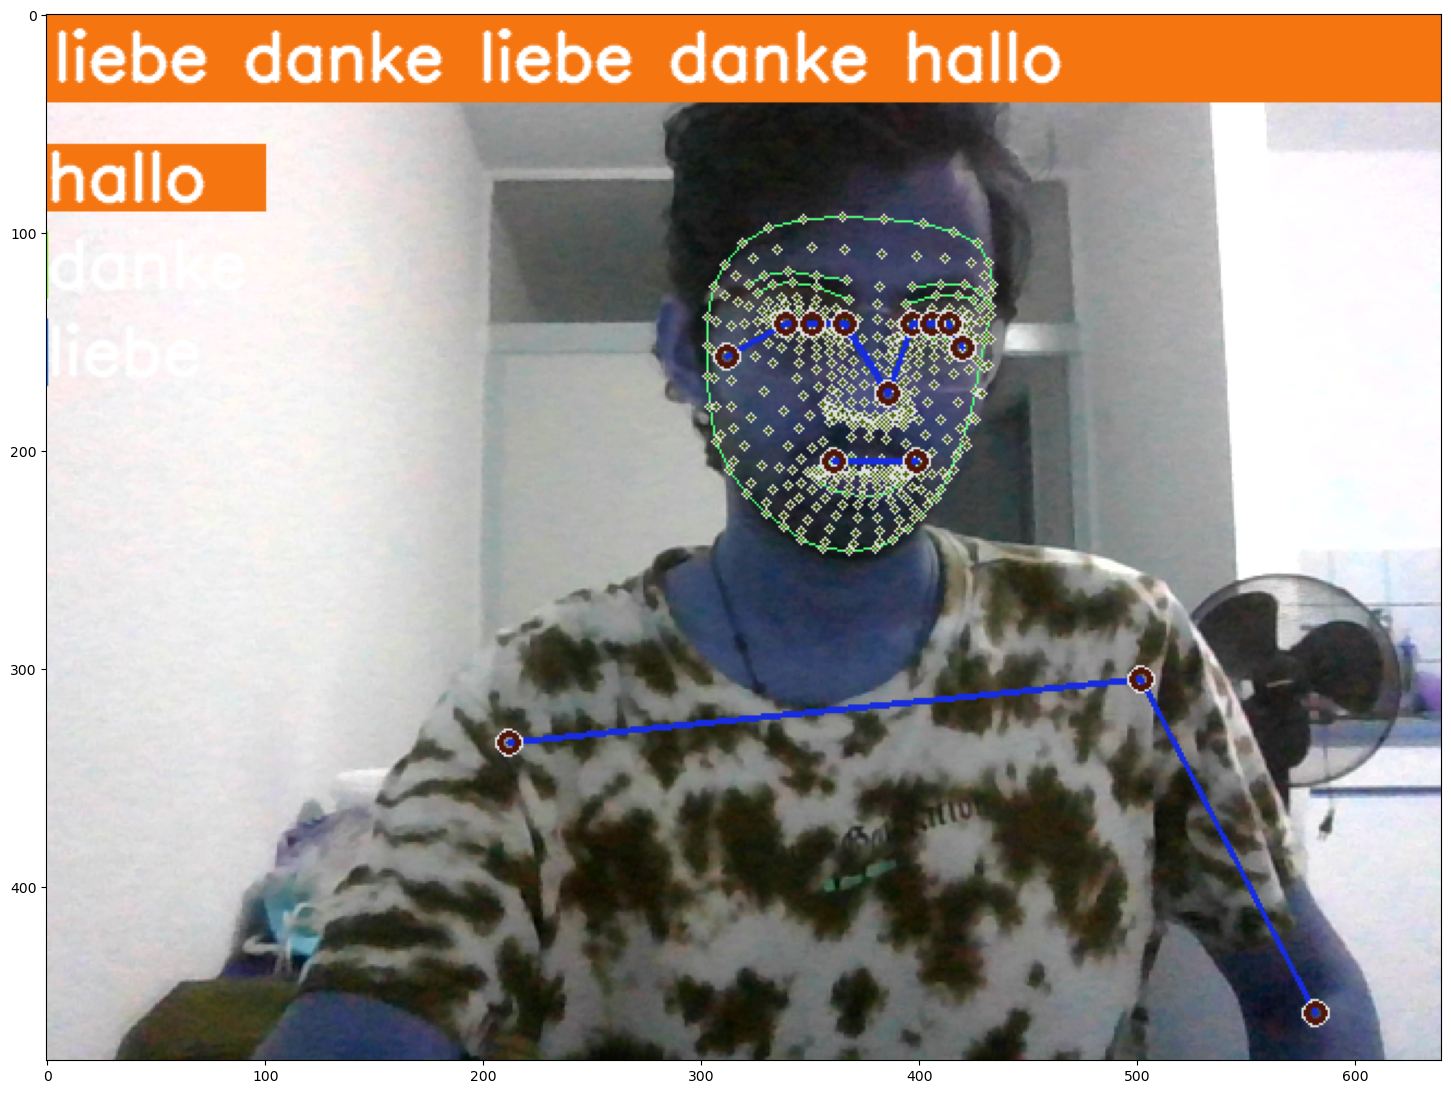

In [172]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))


In [175]:
# detection variables

#sequence = [] will collect our 30 frames inorder to generate prediction and as we loop through openCV we will append to this and then pass it our prediction algorithm to start predictions 
sequence = []

#sentence = [] will allow us to concatenate our history of detections together 
sentence = []
predictions = []

#threshold is like somewhat our confidence matrix which will render the result when it is above certain threshold
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mp_detect(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        #we will only predict if we have 30 frames 
        if len(sequence) == 30:
            #expand_dims adds an extra dimension allowing us to pass one sequence as well
            #it makes our one sequence from 2D to 3D and as we have given axis=0 then it will be along rows
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            
            
        #3. Viz logic
            
            #grabs the last 10 predictions and prints only the unique actions from it...this gives more stability while predicting our actions
            if np.unique(predictions[-10:])[0]==np.argmax(res): 

                if res[np.argmax(res)] > threshold: 

                    #check if we have words in the sentences array. If not, append to it.
                    #If we do,check the current predicted word is same or not. If it is same then skip the append to prevent duplication.
                    #If it is not same then append
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            # if appended sentence is >5 then take the last 5 value to not end up with the giant array we want to render.
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz(visualization) probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread (0x85fa4c0).
Cannot move to target thread (0x85de920)

QObject::moveToThread: Current thread (0x85de920) is not the object's thread

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 28ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hallo
<class 'mediapipe.pyth

1/1 [==============================] - 0s 24ms/step
liebe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
liebe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
liebe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
liebe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
liebe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
liebe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
liebe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
liebe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
liebe
<class 'mediapipe.pyth

1/1 [==============================] - 0s 31ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hallo
<class 'mediapipe.pyth

1/1 [==============================] - 0s 25ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hallo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
hallo
<class 'mediapipe.pyth

In [170]:
cap.release()
cv2.destroyAllWindows()
